In [1]:
my_path = "/content/drive/MyDrive/AD/2024_Viagem.csv"

In [2]:
import pandas as pd

df_viagens = pd.read_csv(my_path, sep=';', encoding='latin-1', decimal=',')

In [ ]:
pd.set_option('display.max_columns', None)
(df_viagens['Cargo'].value_counts(normalize=True) * 100).rename('Proporção de viagens').reset_index()

,Cargo,Proporção de viagens
0,Informações protegidas por sigilo,24.555068
1,PROFESSOR DO MAGISTERIO SUPERIOR,10.510583
2,PROFESSOR ENS BASICO TECN TECNOLOGICO,7.091266
3,CONTRATADO LEI 8745/93 - NI,3.601773
4,AUDITOR FISCAL FEDERAL AGROPECUARIO,3.388314
...,...,...
846,LINOTIPISTA,0.000209
847,DIRETOR DE ARTES CENICAS,0.000209
848,JORNALISTA I,0.000209
849,TERAPEUTA OCUPACIONAL - 30H,0.000209


In [3]:
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos']

In [4]:
pd.set_option('display.float_format', '{:.2f}'.format)

df_viagens.groupby('Cargo')['Despesas'].sum().reset_index().sort_values('Despesas', ascending=False)

,Cargo,Despesas
465,Informações protegidas por sigilo,395941764.16
595,PROFESSOR DO MAGISTERIO SUPERIOR,111760891.89
596,PROFESSOR ENS BASICO TECN TECNOLOGICO,51755428.52
714,TECNICO DO SEGURO SOCIAL,44550579.70
91,ANALISTA AMBIENTAL,36055820.07
...,...,...
366,DIVULGADOR SANITARIO,122.05
538,OPERADOR DE CONSOLE,122.05
535,OPERADOR DE CENTRAL HIDRELETRICA,0.00
348,DELEGADO DE POLICIA FEDERAL 3A CLASSE,0.00


In [5]:
viagens_por_cargo = (df_viagens['Cargo'].value_counts(normalize=True) * 100).rename('Proporção de viagens').reset_index()

In [6]:
gastos_totais_por_cargo = df_viagens.groupby('Cargo')['Despesas'].sum().reset_index().sort_values('Despesas', ascending=False)
gastos_totais_por_cargo[gastos_totais_por_cargo['Despesas'] > 10_000_000]

,Cargo,Despesas
465,Informações protegidas por sigilo,395941764.16
595,PROFESSOR DO MAGISTERIO SUPERIOR,111760891.89
596,PROFESSOR ENS BASICO TECN TECNOLOGICO,51755428.52
714,TECNICO DO SEGURO SOCIAL,44550579.70
91,ANALISTA AMBIENTAL,36055820.07
230,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,32810844.62
411,ESP EM REGULACAO E VIGILANCIA SANITARIA,26750982.39
229,AUDITOR FISCAL FEDERAL AGROPECUARIO,25053453.99
133,ANALISTA TRIBUTARIO REC FEDERAL BRASIL,20540198.83
199,ASSISTENTE EM ADMINISTRAçãO,15529029.21


In [7]:
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('NÃO IDENTIFICADO')

In [8]:
df_viagens['Período - Data de início'] = pd.to_datetime(df_viagens['Período - Data de início'], format='%d/%m/%Y')
df_viagens['Período - Data de fim'] = pd.to_datetime(df_viagens['Período - Data de fim'], format='%d/%m/%Y')

In [9]:
df_viagens['Mês da viagem'] = df_viagens['Período - Data de início'].dt.month_name()
df_viagens['Dias da viagem'] = (df_viagens['Período - Data de fim'] - df_viagens['Período - Data de início']).dt.days

In [10]:
df_viagens_consolidado =  (
    df_viagens
    .groupby('Cargo')
    .agg(
        despesa_media = ('Despesas', 'mean'),
        duracao_media =  ('Dias da viagem', 'mean'),
        despesas_totais = ('Despesas', 'sum'),
        destino_mais_frequente = ('Destinos', pd.Series.mode),
        n_viagens = ('Nome', 'count')
    )
    .reset_index()
  )

In [11]:
df_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()

In [12]:
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] > 0.01, 'Cargo']

In [13]:
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)
df_final = df_viagens_consolidado[filtro]

<Axes: xlabel='Cargo'>

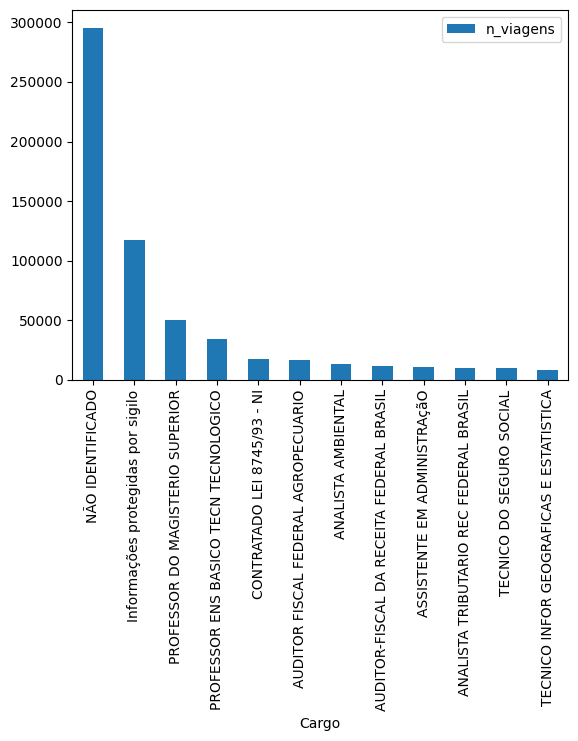

In [14]:
df_final = df_final.sort_values('n_viagens', ascending=False)
df_final.plot(x="Cargo", y="n_viagens", kind="bar")

In [15]:
import matplotlib.pyplot as plt

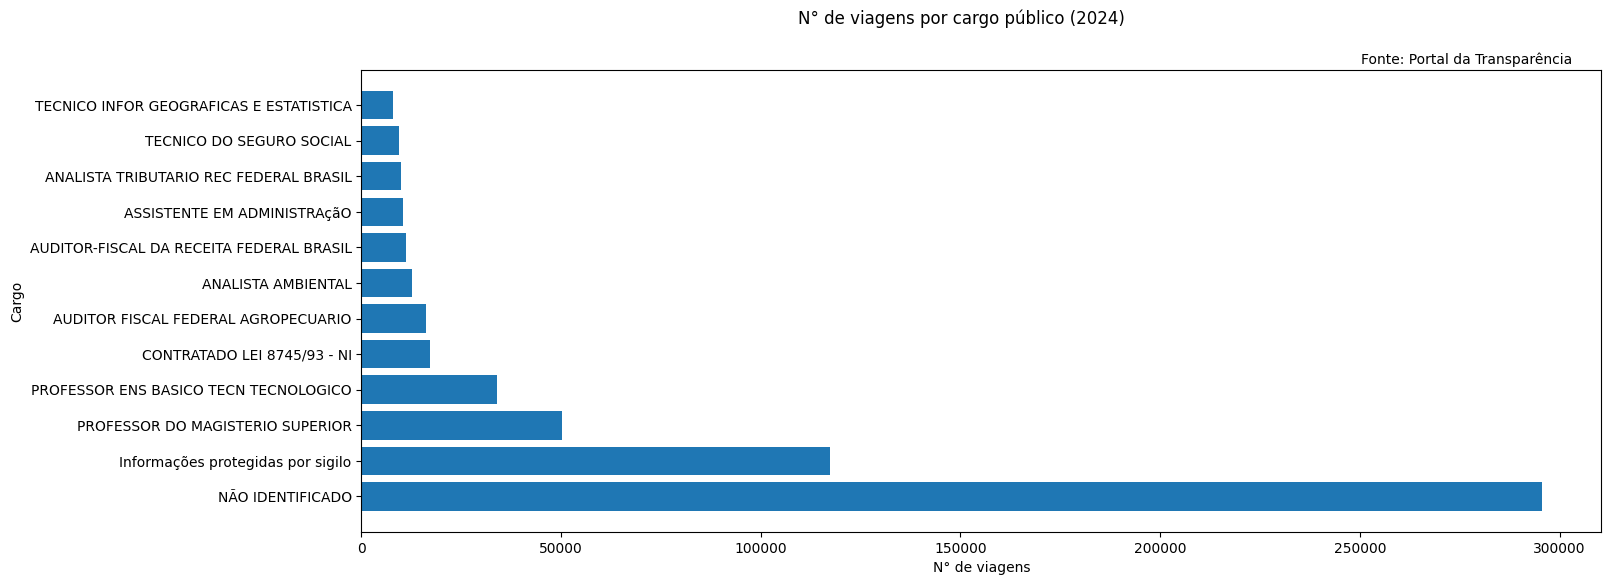

In [16]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.barh(df_final['Cargo'], df_final['n_viagens'])
ax.set_xlabel('N° de viagens')
ax.set_ylabel('Cargo')
fig.suptitle('N° de viagens por cargo público (2024)')

plt.figtext(0.75, 0.89, 'Fonte: Portal da Transparência')

plt.show()

Text(0, 0.5, 'Despesas')

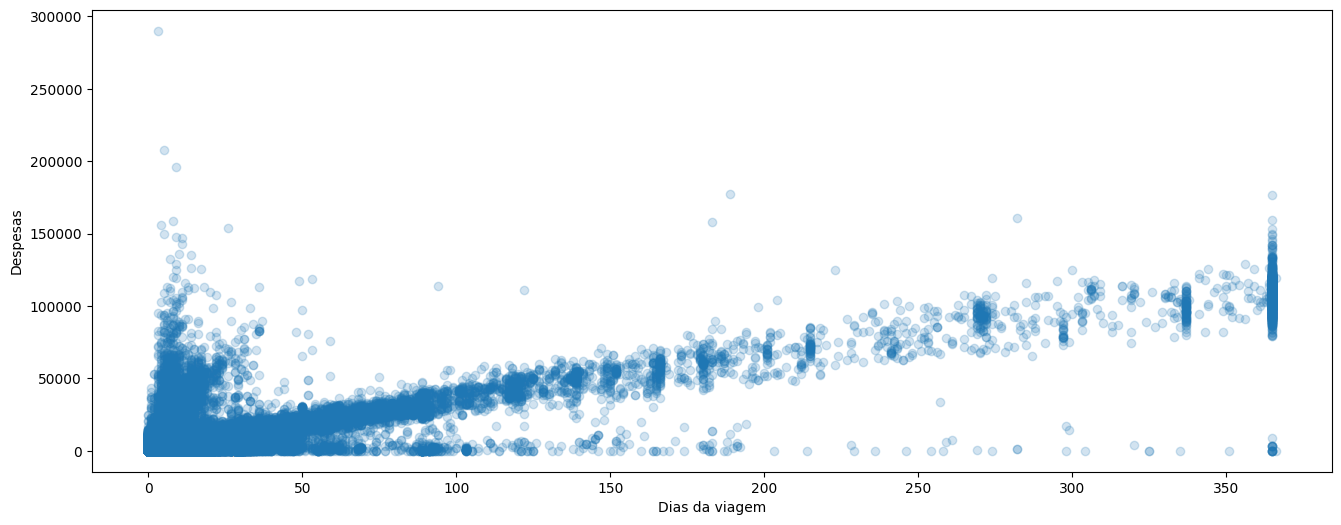

In [17]:
fig, ax = plt.subplots(figsize=(16, 6))

ax.scatter(df_viagens['Dias da viagem'], df_viagens['Despesas'], alpha=0.2)
ax.set_xlabel('Dias da viagem')
ax.set_ylabel('Despesas')